In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
m=pd.read_csv("motor.csv")
m.head()

,Motor cycle Name,fueltype,aspiration,doornumber,starter,surat,maintenance,enginelocation,wheelbase,motorcycle length,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,maks_kecepatan,peakrpm,citympg,highwaympg,price
0,Royal Enfield Thunderbird 350,bensin,std,two,Kick,ada,tidak,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,Honda Dream Yuga,bensin,std,two,Kick,ada,ada,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,TVS Apache RTR 160 4V,bensin,std,two,Kick,ada,ada,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,Honda Navi [2016-2017],bensin,std,four,Electric & kick,tidak,tidak,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,Yamaha Fazer [2009-2016],bensin,std,four,Electric & kick,tidak,tidak,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print("The number of rows is:", m.shape[0])
print("The number of columns is:", m.shape[1])

The number of rows is: 199
The number of columns is: 25


In [ ]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Motor cycle Name    199 non-null    object 
 1   fueltype            199 non-null    object 
 2   aspiration          199 non-null    object 
 3   doornumber          199 non-null    object 
 4   starter             199 non-null    object 
 5   surat               199 non-null    object 
 6   maintenance         199 non-null    object 
 7   enginelocation      199 non-null    object 
 8   wheelbase           199 non-null    float64
 9   motorcycle length   199 non-null    float64
 10  speedometer         199 non-null    float64
 11  motorcycle height   199 non-null    float64
 12  motorcycle bweight  199 non-null    int64  
 13  enginetype          199 non-null    object 
 14  cylindernumber      199 non-null    object 
 15  enginesize          199 non-null    int64  
 16  fuelsyst

In [ ]:
def null_count():
    return pd.DataFrame({'Data Type': m.dtypes,
                        'Null Count': m.isnull().sum(),
                        'Percentage of Null': (m.isnull().sum()/ m.shape[0])*100}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,Data Type,Null Count,Percentage of Null
Motor cycle Name,object,0,0.000000
fueltype,object,0,0.000000
aspiration,object,0,0.000000
doornumber,object,0,0.000000
starter,object,0,0.000000
surat,object,0,0.000000
maintenance,object,0,0.000000
enginelocation,object,0,0.000000
wheelbase,float64,0,0.000000
motorcycle length,float64,0,0.000000


In [ ]:
m['Company']=m['Motor cycle Name'].str.split(' ', expand=True)[0]
m.head()

,Motor cycle Name,fueltype,aspiration,doornumber,starter,surat,maintenance,enginelocation,wheelbase,motorcycle length,...,fuelsystem,boreratio,stroke,compressionratio,maks_kecepatan,peakrpm,citympg,highwaympg,price,Company
0,Royal Enfield Thunderbird 350,bensin,std,two,Kick,ada,tidak,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Royal
1,Honda Dream Yuga,bensin,std,two,Kick,ada,ada,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Honda
2,TVS Apache RTR 160 4V,bensin,std,two,Kick,ada,ada,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,TVS
3,Honda Navi [2016-2017],bensin,std,four,Electric & kick,tidak,tidak,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Honda
4,Yamaha Fazer [2009-2016],bensin,std,four,Electric & kick,tidak,tidak,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Yamaha


In [ ]:
m.drop(columns=['doornumber','motorcycle length', 'motorcycle bweight','enginelocation', 'motorcycle height', 'cylindernumber', 'highwaympg', 'citympg'], inplace=True)
m.head(3)

,Motor cycle Name,fueltype,aspiration,starter,surat,maintenance,wheelbase,speedometer,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,maks_kecepatan,peakrpm,price,Company
0,Royal Enfield Thunderbird 350,bensin,std,Kick,ada,tidak,88.6,64.1,dohc,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,Royal
1,Honda Dream Yuga,bensin,std,Kick,ada,ada,88.6,64.1,dohc,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,Honda
2,TVS Apache RTR 160 4V,bensin,std,Kick,ada,ada,94.5,65.5,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,TVS


In [ ]:
m.drop(columns=['compressionratio', 'aspiration', 'boreratio', 'aspiration'], inplace=True)
m.head(3)

,Motor cycle Name,fueltype,starter,surat,maintenance,wheelbase,speedometer,enginetype,enginesize,fuelsystem,stroke,maks_kecepatan,peakrpm,price,Company
0,Royal Enfield Thunderbird 350,bensin,Kick,ada,tidak,88.6,64.1,dohc,130,mpfi,2.68,111,5000,13495.0,Royal
1,Honda Dream Yuga,bensin,Kick,ada,ada,88.6,64.1,dohc,130,mpfi,2.68,111,5000,16500.0,Honda
2,TVS Apache RTR 160 4V,bensin,Kick,ada,ada,94.5,65.5,ohcv,152,mpfi,3.47,154,5000,16500.0,TVS


In [ ]:
print("The number of rows is:", m.shape[0])
print("The number of columns is:", m.shape[1])

The number of rows is: 199
The number of columns is: 15


In [ ]:
m.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,199.0,98.763317,5.988070,86.60,94.50,97.00,102.40,120.90
speedometer,199.0,65.955276,2.147858,60.30,64.30,65.50,66.90,72.30
enginesize,199.0,150.256281,41.566421,92.00,121.00,146.00,162.50,326.00
stroke,199.0,3.253970,0.316992,2.07,3.11,3.29,3.41,4.17
maks_kecepatan,199.0,104.738693,39.839477,48.00,70.00,95.00,118.00,288.00
peakrpm,199.0,5129.648241,477.710636,4150.00,4800.00,5200.00,5500.00,6600.00
price,199.0,13396.244558,8066.757207,5118.00,7793.50,10345.00,16536.50,45400.00


In [ ]:
m.describe(include='O').T

,count,unique,top,freq
Motor cycle Name,199,112,Bajaj Pulsar 150,9
fueltype,199,1,bensin,199
starter,199,3,Electric & kick,78
surat,199,2,tidak,125
maintenance,199,2,tidak,113
enginetype,199,7,ohc,144
fuelsystem,199,7,mpfi,94
Company,199,8,Bajaj,46


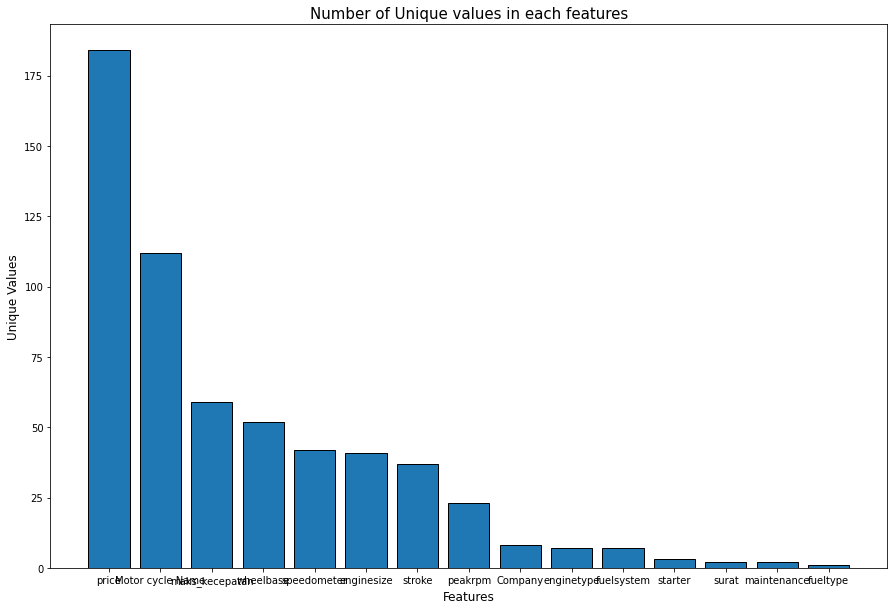

In [ ]:
x= m.nunique().sort_values(ascending=False).index
y = m.nunique().sort_values(ascending=False).values
fig, barplot = plt.subplots(figsize = (15,10))
barplot = plt.bar(x, y, ec="black")
plt.title("Number of Unique values in each features", size=15)
plt.xlabel("Features", size=12)
plt.ylabel("Unique Values", size=12)
plt.show()

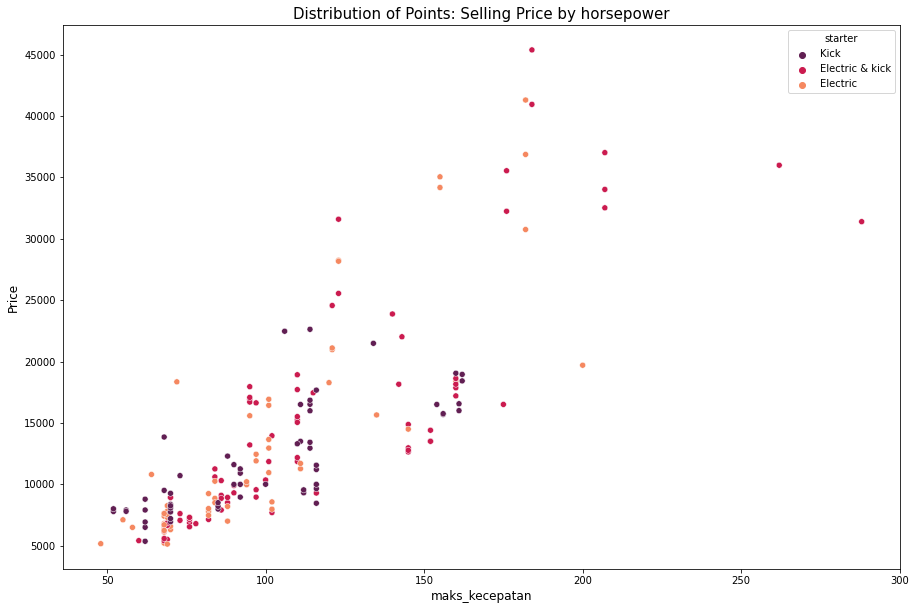

In [ ]:
fig, scatter = plt.subplots(figsize = (15,10))
scatter = sns.scatterplot(data=m, x="maks_kecepatan", y="price", hue="starter", palette="rocket")
plt.title("Distribution of Points: Selling Price by horsepower", size=15)
plt.xlabel("maks_kecepatan", size=12)
plt.ylabel("Price", size=12)
plt.show()

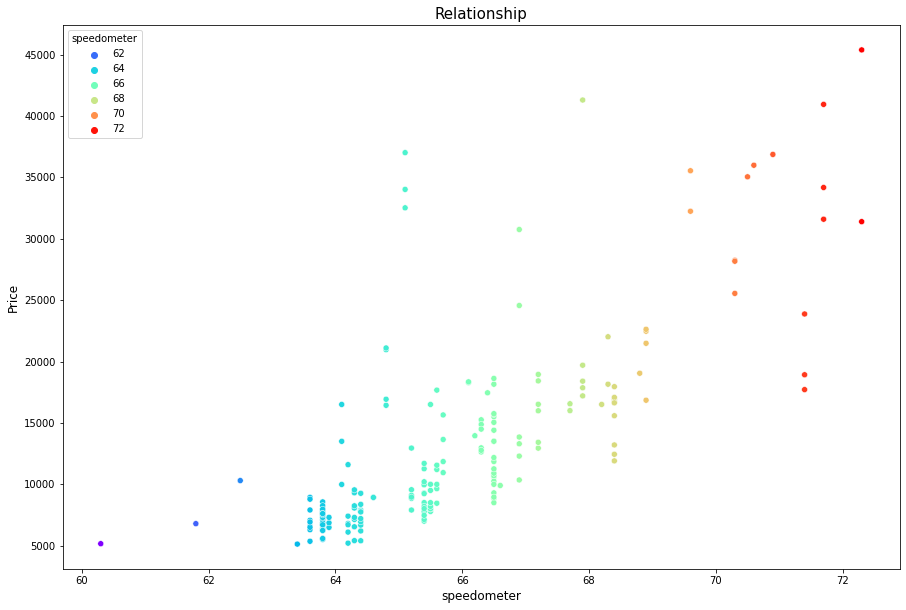

In [ ]:
fig, scatterplot = plt.subplots(figsize = (15,10))
scatterplot= sns.scatterplot(data=m, x="speedometer", y="price", hue="speedometer", palette="rainbow")
plt.title("Relationship", size=15)
plt.xlabel("speedometer", size=12)
plt.ylabel("Price", size=12)
plt.show()

Correlation between enginesize and Selling Price is: 0.4873058715076525
Correlation between horsepower and Selling Price is: 0.8078012135452824


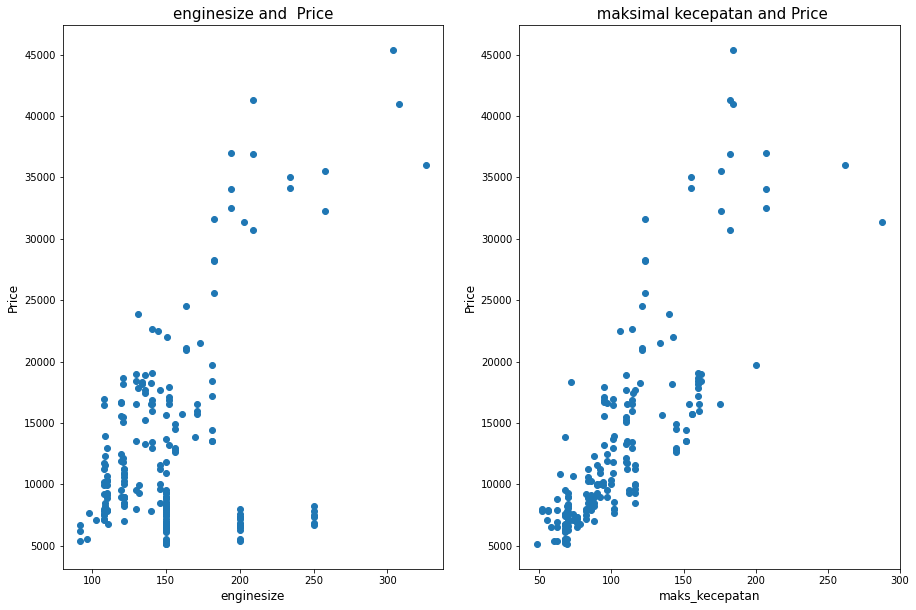

In [ ]:
a=m['enginesize']
b=m['price']
fig, scatterplot = plt.subplots(figsize =(15,10))
plt.subplot(1,2,1)
scatter = plt.scatter(a, b)
data1=m.corr()["enginesize"]["price"]
print("Correlation between enginesize and Selling Price is:", data1)
plt.title("enginesize and  Price",size=15)
plt.xlabel("enginesize", size=12)
plt.ylabel("Price", size=12)

x=m['maks_kecepatan']
y=m['price']
plt.subplot(1,2,2)
scatter = plt.scatter(x, y)
data2=m.corr()["maks_kecepatan"]["price"]
print("Correlation between horsepower and Selling Price is:", data2)
plt.title(" maksimal kecepatan and Price", size=15)
plt.xlabel("maks_kecepatan", size=12)
plt.ylabel("Price", size=12)
plt.show()

In [ ]:
company_name = m.Company.value_counts().index[:15]
for i in range(m.shape[0]):
    if m['Company'][i] in company_name:
         continue
    else:
        m['Company'][i] = 'others'

In [ ]:
m.replace({'starter': {'Kick': 0, 'Electric & kick':1, 'Electric': 2}}, inplace=True)

m.replace({'surat': {'tidak': 0, 'ada':1}}, inplace=True)

m.replace({'maintenance': {'tidak': 0, 'ada':1}}, inplace=True)

m.replace({'Company': {'Bajaj': 0, 'Royal':1, 'Honda': 2, 'Yamaha': 3, 'TVS': 4, 'Hero': 5, 'KTM': 6, 'Suzuki':7}}, inplace=True)

In [ ]:
m.head()

,Motor cycle Name,fueltype,starter,surat,maintenance,wheelbase,speedometer,enginetype,enginesize,fuelsystem,stroke,maks_kecepatan,peakrpm,price,Company
0,Royal Enfield Thunderbird 350,bensin,0,1,0,88.6,64.1,dohc,130,mpfi,2.68,111,5000,13495.0,1
1,Honda Dream Yuga,bensin,0,1,1,88.6,64.1,dohc,130,mpfi,2.68,111,5000,16500.0,2
2,TVS Apache RTR 160 4V,bensin,0,1,1,94.5,65.5,ohcv,152,mpfi,3.47,154,5000,16500.0,4
3,Honda Navi [2016-2017],bensin,1,0,0,99.8,66.2,ohc,109,mpfi,3.40,102,5500,13950.0,2
4,Yamaha Fazer [2009-2016],bensin,1,0,0,99.4,66.4,ohc,136,mpfi,3.40,115,5500,17450.0,3


In [ ]:
x = m.drop(['fueltype', 'stroke', 'wheelbase', 'Motor cycle Name', 'enginetype', 'fuelsystem', 'price', 'starter'], axis=1)
y = m['price']
x

,surat,maintenance,speedometer,enginesize,maks_kecepatan,peakrpm,Company
0,1,0,64.1,130,111,5000,1
1,1,1,64.1,130,111,5000,2
2,1,1,65.5,152,154,5000,4
3,0,0,66.2,109,102,5500,2
4,0,0,66.4,136,115,5500,3
...,...,...,...,...,...,...,...
194,1,1,68.9,141,114,5400,1
195,1,0,68.8,141,160,5300,5
196,1,1,68.9,173,134,5500,0
197,1,1,68.9,145,106,4800,4


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=25)
print(xtrain.shape)
print(xtest.shape)

(139, 7)
(60, 7)


In [ ]:
"""scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)"""

'scaler = StandardScaler()\nxtrain = scaler.fit_transform(xtrain)\nxtest = scaler.transform(xtest)'

In [ ]:
lr=LinearRegression()
model_1=lr.fit(xtrain, ytrain)
model_1

LinearRegression()

In [ ]:
prediction=model_1.predict(xtest)
prediction

array([ 5810.31094204,  5854.51611212, 16359.18531477, 11632.34547694,
       26559.8313611 , 11492.50892307, 27260.02616208,  3829.97350904,
        8187.73473847, 19296.22943944, 21854.47961024, 25686.62038701,
       17504.17670506, 23477.25495315, 23284.34407525, 11173.52898064,
        8290.7035326 ,  9276.7648387 , 18102.21114015, 16999.85055911,
        4196.10145531,  5895.12106068,  6644.57170283,  9972.73468369,
       17233.78214262,  9803.55029511, 19302.61300719,  5970.47725313,
        8638.15547542,  8051.086604  , 10045.68392179, 20930.79825525,
        8432.66707052, 10045.68392179,  5947.02994528, 15413.51082383,
        6380.60480457, 17183.84408289, 20773.77355712,  4551.53821169,
       16642.93242791, 11851.55995156,  8406.80098609, 19196.88566346,
        6217.23174477, 16674.147653  , 19731.20305585, 17474.97920843,
        6347.65742497, 23637.42126424,  8187.73473847, 11834.03305049,
        6356.98689176,  4753.73957166, 11524.68661917, 10995.12595919,
      

In [ ]:
print("Model Score:", model_1.score(xtest, ytest))

Model Score: 0.7201467871504921


In [ ]:
rfr=RandomForestRegressor()
model_2=rfr.fit(xtrain.values, ytrain)
model_2

RandomForestRegressor()

In [ ]:
prediction=model_2.predict(xtest)
prediction

array([ 6856.88      ,  8009.39666667, 13379.00238095, 10860.38      ,
       30728.66667   , 11422.97666667, 28747.92066667,  7901.85166667,
        7188.52833333, 16349.7       , 15574.39501   , 26773.569     ,
       14092.74500333, 17500.71000667, 32571.59      ,  9250.01      ,
        6378.36583333, 10933.48      , 14371.13238095, 14080.55      ,
        6133.66666667,  6343.415     ,  9124.19333333, 11024.03      ,
       16088.97      ,  7704.77      , 22698.34666667,  6758.9       ,
        9962.91      ,  8414.72166667,  7553.86333333, 16385.01666667,
        7229.63      ,  7553.86333333,  6410.5165    , 11364.8       ,
       10682.63      , 13526.35833667, 17648.32171   ,  7587.73      ,
       10321.29      , 14209.09333333,  6785.90333333, 21777.07333333,
        7029.96      , 15886.24      , 22846.59166667, 16392.92      ,
        6999.075     , 17508.94834333,  7188.52833333, 10808.44666667,
       10156.495     ,  6895.9675    , 12434.86      , 10667.77      ,
      

In [ ]:
print("Model Score:", model_2.score(xtest, ytest))

Model Score: 0.8449403961447446


In [ ]:
pred=model_2.predict([[0,1,64.1, 130, 111, 5000, 1]])
print(pred)

[12840.84]


In [ ]:
data_=pickle.dump(rfr, open('rfr_model.sav', 'wb'))
m.to_csv('clean_train.csv', index=False)

data2=pickle.dump(rfr, open('saved_rfr.pkl', 'wb'))

In [ ]:
with open("saved_rfr.pkl", "rb") as file:
    data2=pickle.load(file)